In [7]:
from mosqlient.models.baseline import Arima

It calls the class associated with the Arima baseline model. In this step, it is necessary to define the city and disease to which the model will be applied.

The ARIMA model is defined by: 

$$y_t = c + \phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t,$$

$p$ - order of the autoregressive part;

$d$ - degree of first differencing involved;

$q$ - order of the moving average part. 

If $d=1$: $y_t = Y_t - Y_{t-1},$ 

If $d=2$: $y_t = (Y_t - Y_{t-1}) - (Y_{t-1} - Y_{t-2}),$
and so on. 

The model's parameters are optimized using the `aic` metric and the `auto_arima` function of the `pmdarima` package. 

Before the application of the model the data is transformed using a `boxcox` transformation. The `lambda` parameter is estimated by optimization. 

In [8]:
m_arima = Arima(geocode = 3304557, disease = 'dengue')

m_arima

### Train the model 

To use this method is necessary to define a data of begin and end of training

In [9]:
model = m_arima.train( train_ini_date='2010-01-01', train_end_date = '2021-12-31')

model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-291.303, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-263.031, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-297.620, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-289.702, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-264.935, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-302.773, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-301.987, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-308.875, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-301.181, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-306.876, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-305.545, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-306.272, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-310.782, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-303.034, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]          

ARIMA(maxiter=100, order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

#### Predictions in sample

Performace of the model in the sample

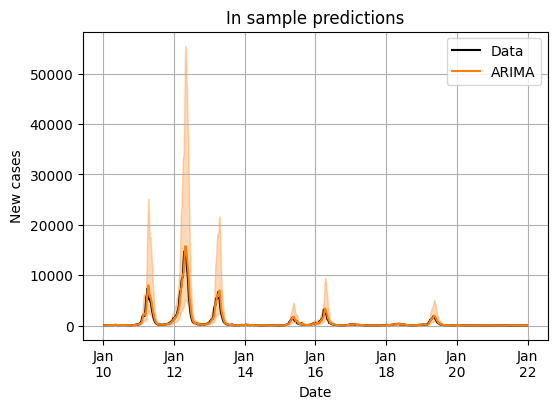

In [4]:
df_in_sample = m_arima.predict_in_sample(plot = True)

In [5]:
df_in_sample.head()

,date,preds,lower,upper,data
1,2010-01-10,29.999999,17.195241,54.460515,44.0
2,2010-01-17,40.109447,22.919088,73.070447,46.0
3,2010-01-24,47.548675,26.956062,87.413968,47.0
4,2010-01-31,48.534823,27.525448,89.188390,68.0
5,2010-02-07,64.439819,35.896396,120.889823,56.0


#### Predictions out of sample

In this method is necessary to define the end date for evaluation and the horizon that will be forecasted by the model

,date,preds,lower,upper,data
0,2022-01-02,3.614690,2.380062,5.611839,21.0
1,2022-01-09,3.433250,2.039615,5.982624,14.0
2,2022-01-16,3.252150,1.717527,6.491965,22.0
3,2022-01-23,3.118710,1.490771,7.008234,19.0
0,2022-01-30,21.331039,12.570340,37.513894,31.0


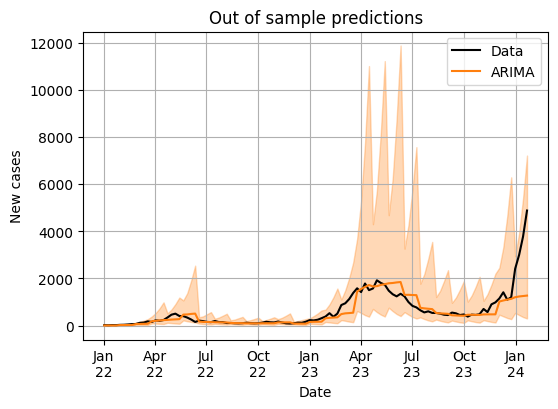

In [6]:
df_out = m_arima.predict_out_of_sample(horizon = 4, end_date = '2023-12-31', plot = True)

df_out.head()    

### Forecast 

To forecast is necessary to train the model before. The forecast will be done after the last day used in the training step. 

/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/baseline.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.y = boxcox.transform(df_train.y)[0]


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1800.501, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1986.356, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1838.788, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1820.321, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1984.410, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1800.874, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1817.466, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1795.478, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1818.133, Time=0.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1796.222, Time=0.39 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1776.958, Time=0.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1804.844, Time=0.15 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1799.474, Time=0.36 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : 

,date,preds,lower,upper,adm_2
0,2024-01-07,1950.654449,668.615380,5369.847774,3304557
1,2024-01-14,2167.769160,679.666230,6460.488158,3304557
2,2024-01-21,2372.901769,671.350897,7742.348210,3304557
3,2024-01-28,2576.959678,654.688518,9236.041802,3304557


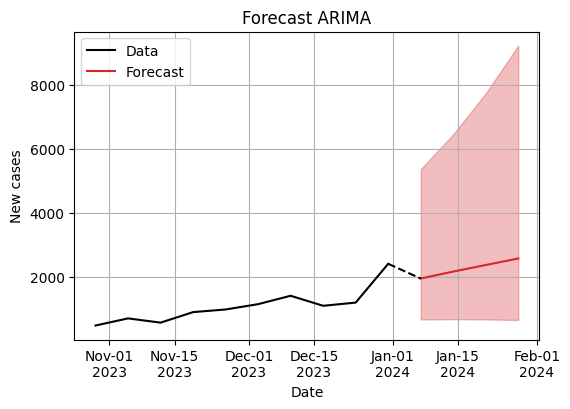

In [10]:
model = m_arima.train( train_ini_date='2010-01-01', train_end_date = '2023-12-31')

df_for = m_arima.forecast(horizon = 4, plot = True, last_obs = 10)

df_for.head()